In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

orign 생성 (orign data가 있으면 건너뛰기)

In [2]:
###############################parameter####################################
signal_name = 'signal2'

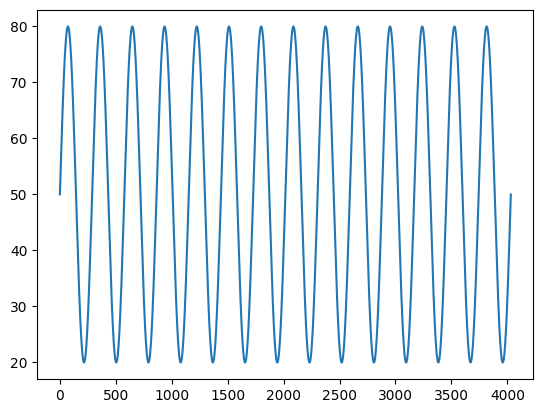

In [3]:
x = np.linspace(0,28*np.pi,4032)
y = 30*np.sin(x)+50
plt.plot(y)

In [4]:
np.savetxt(f"data/origin/{signal_name}.csv",y,header="value",delimiter=',',comments='')

orign 데이터 기반으로 
signal별 normal과 anormal 생성

In [27]:
###############################parameter####################################
signal_name = 'signal1'
file_cnt = 100

In [28]:
#signal 폴더 만들기
%cd data
! mkdir {signal_name}

# signal별 normal data 폴더 생성
%cd {signal_name}
! mkdir normal
%cd ..

# signal별 drift data 폴더 생성
%cd {signal_name}
! mkdir anormal_drift
%cd ..

# signal별 erratic data 폴더 생성
%cd {signal_name}
! mkdir anormal_erratic
%cd ..

# signal별 hardover data 폴더 생성
%cd {signal_name}
! mkdir anormal_hardover
%cd ..

# signal별 spike data 폴더 생성
%cd {signal_name}
! mkdir anormal_spike
%cd ..

# signal별 stuck data 폴더 생성
%cd {signal_name}
! mkdir anormal_stuck
%cd ..

# make_new_data 있는 폴더로 돌아오기
%cd ..

c:\Users\yirang\Desktop\detect_anormal2\detect_anormal2\data


c:\Users\yirang\Desktop\detect_anormal2\detect_anormal2\data\signal1
c:\Users\yirang\Desktop\detect_anormal2\detect_anormal2\data
c:\Users\yirang\Desktop\detect_anormal2\detect_anormal2\data\signal1
c:\Users\yirang\Desktop\detect_anormal2\detect_anormal2\data
c:\Users\yirang\Desktop\detect_anormal2\detect_anormal2\data\signal1
c:\Users\yirang\Desktop\detect_anormal2\detect_anormal2\data
c:\Users\yirang\Desktop\detect_anormal2\detect_anormal2\data\signal1
c:\Users\yirang\Desktop\detect_anormal2\detect_anormal2\data
c:\Users\yirang\Desktop\detect_anormal2\detect_anormal2\data\signal1
c:\Users\yirang\Desktop\detect_anormal2\detect_anormal2\data
c:\Users\yirang\Desktop\detect_anormal2\detect_anormal2\data\signal1
c:\Users\yirang\Desktop\detect_anormal2\detect_anormal2\data
c:\Users\yirang\Desktop\detect_anormal2\detect_anormal2


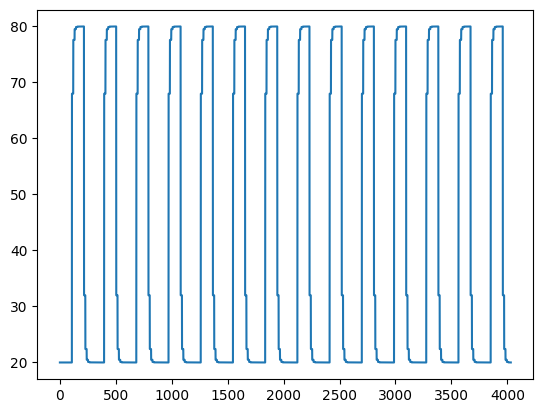

In [29]:
# normal과 anormal 신호 생성할 origin 신호
df_orign = pd.read_csv(f'data/origin/{signal_name}.csv')
df_orign = df_orign['value']
np_orign = df_orign.values

len_value = len(np_orign)
plt.plot(np_orign)

In [30]:
#약간의 노이즈 추가하여 normal 데이터 생성
for i in range(file_cnt):
    np_random_value = 2*np.random.normal(0,1,len_value)
    np_normal_noise = np_random_value + np_orign
    
    np_error = np.array([0 for _ in range(len_value)])
    np_normal_error  = np.column_stack((np_normal_noise,np_error))
    header="value,error"
    np.savetxt(f"data/{signal_name}/normal/{signal_name}_normal{i}.csv",np_normal_error,delimiter=',',header=header, comments='')

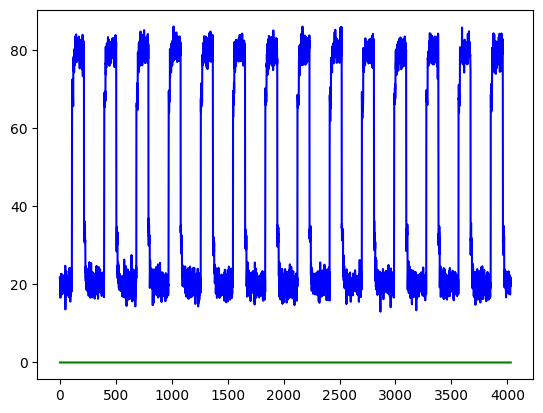

In [31]:
# 잘 생성되었나 test
test = pd.read_csv(f"data/{signal_name}/normal/{signal_name}_normal0.csv")
plt.plot(test["value"],c='blue')
plt.plot(test["error"],c='green')

In [32]:
#drift 생성
for i in range(file_cnt):
    np_random_value = 2*np.random.normal(0,1,len_value)
    np_normal_noise = np_random_value + np_orign
    #drift 초기화
    drift_start = np.random.randint(100, 2500) #drift 시작할 번째
    drift_offset = 100*np.random.randint(5, 15) #drift 지속 시간
    drift_size = 0.1*(1+0.1*np.random.randint(1, 10)) #drift y축 크기
    # drift error 생성
    np_error_size = np.array([0 for _ in range(len_value)])
    np_error_size[drift_start:drift_start+drift_offset] = drift_size*np.arange(0, drift_offset)
    # normal애 drift 에러 추가
    np_anormal_drift =  np_normal_noise
    np_anormal_drift += np_error_size

    np_error = np.array([0 for _ in range(len_value)])
    np_error[drift_start:drift_start+drift_offset] = np.array([1 for _ in range(drift_offset)])

    np_anormal_drift_error = np.column_stack((np_anormal_drift,np_error,np_error_size))
    header="value,error,error_size"
    np.savetxt(f"data/{signal_name}/anormal_drift/{signal_name}_drift{i}.csv",np_anormal_drift_error,delimiter=',',header=header, comments='')

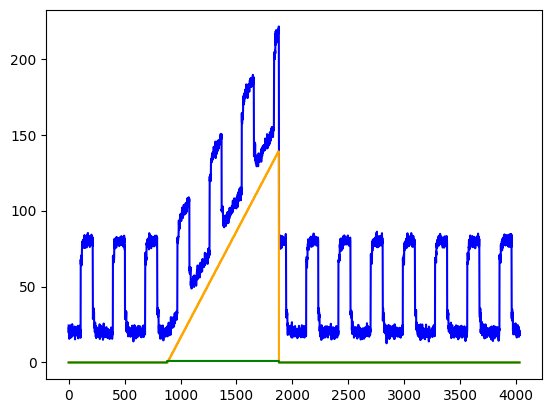

In [42]:
# 잘 생성되었나 test
test = pd.read_csv(f"data/{signal_name}/anormal_drift/{signal_name}_drift0.csv")
plt.plot(test["value"],c='blue')
plt.plot(test["error_size"],c='orange')
plt.plot(test["error"],c='green')

In [34]:
#hard-over 생성
for i in range(file_cnt):
    #normal 생성
    np_random_value = 2*np.random.normal(0,1,len_value)
    np_normal_noise = np_random_value + np_orign
    #hard-over 초기화
    hardover_start = np.random.randint(100, 2500) #hardover 시작할 구간
    hardover_offset =  100*np.random.randint(5, 15) #hardover 지속시간
    hardover_size = np.random.randint(50, 200) # hardover y축 크기
    #hard-over 생성
    np_error_size = np.array([0 for _ in range(len_value)])
    np_error_size[hardover_start:hardover_start+hardover_offset] = hardover_size*np.array([1 for _ in range(hardover_offset)])
    #normal에 hardover 에러 추가
    np_anormal_hardover = np_normal_noise
    np_anormal_hardover += np_error_size

    np_error = np.array([0 for _ in range(len_value)])
    np_error[hardover_start:hardover_start+hardover_offset] = np.array([2 for _ in range(hardover_offset)])

    np_anormal_hardover_error = np.column_stack((np_anormal_hardover,np_error,np_error_size))
    header = "value,error,error_size"
    np.savetxt(f"data/{signal_name}/anormal_hardover/{signal_name}_hardover{i}.csv",np_anormal_hardover_error,delimiter=',',header=header,comments='')


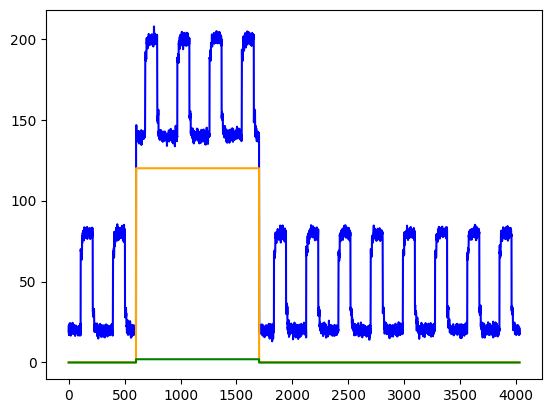

In [43]:
# 잘 생성되었나 test
test = pd.read_csv(f"data/{signal_name}/anormal_hardover/{signal_name}_hardover97.csv")
plt.plot(test["value"],c='blue')
plt.plot(test["error_size"],c='orange')
plt.plot(test["error"],c='green')

In [36]:
#erratic 생성
for i in range(file_cnt):
    #normal 생성
    np_random_value = 2*np.random.normal(0,1,len_value)
    np_normal_noise = np_random_value + np_orign
    #erratic 초기화
    erratic_start = np.random.randint(100, 2500) #erratic 시작할 구간
    erratic_offset =  100*np.random.randint(5, 15) #erratic 지속시간
    erratic_size = np.random.randint(20, 40) # erratic 크기
    #erratic 생성
    np_error_size = np.array([0 for _ in range(len_value)])
    np_error_size[erratic_start:erratic_start+erratic_offset] = erratic_size*np.random.normal(0,1,erratic_offset)
    # normal에 erratic에러 추가
    np_anormal_erratic = np_normal_noise
    np_anormal_erratic += np_error_size

    np_error = np.array([0 for _ in range(len_value)])
    np_error[erratic_start:erratic_start+erratic_offset] = np.array([3 for _ in range(erratic_offset)])

    np_anormal_erratic_error = np.column_stack((np_anormal_erratic,np_error,np_error_size))
    header = "value,error,error_size"
    np.savetxt(f"data/{signal_name}/anormal_erratic/{signal_name}_erratic{i}.csv",np_anormal_erratic_error,delimiter=',',header=header,comments='')


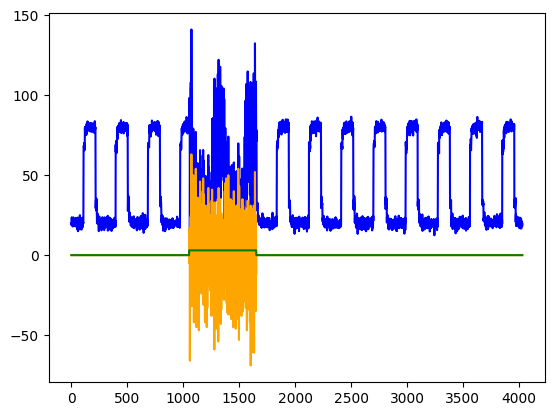

In [44]:

#잘 생성되었나 test
test = pd.read_csv(f"data/{signal_name}/anormal_erratic/{signal_name}_erratic0.csv")
plt.plot(test["value"],c='blue')
plt.plot(test["error_size"],c='orange')
plt.plot(test["error"],c='green')

In [38]:
#spike 생성
for i in range(file_cnt):
    #normal 생성
    np_random_value = 2*np.random.normal(0,1,len_value)
    np_normal_noise = np_random_value + np_orign
    #spike 초기화
    spike_start = np.random.randint(100,2000)
    spike_offset = 20*np.random.randint(5,20)
    spike_time = np.random.randint(3,5) # 2번이상 반복되야함
    #spike 생성
    np_error_size = np.array([0 for _ in range(len_value)])
    only_anormal_spike = []
    for spike in range(spike_time):
        np_error_size[spike_start+spike*spike_offset] = np.random.randint(150,200)
        only_anormal_spike.append(np_error_size[spike_start+spike*spike_offset]) 
    #normal에 hardover 에러 추가
    np_anormal_spike = np_normal_noise
    np_anormal_spike += np_error_size

    np_error = np.array([0 for _ in range(len_value)])
    for spike in range(spike_time):
        np_error[spike_start+spike*spike_offset] = np.array([4])

    np_anormal_spike_error = np.column_stack((np_anormal_spike,np_error,np_error_size))
    header = "value,error,error_size"
    np.savetxt(f"data/{signal_name}/anormal_spike/{signal_name}_spike{i}.csv",np_anormal_spike_error,delimiter=',',header=header,comments='')


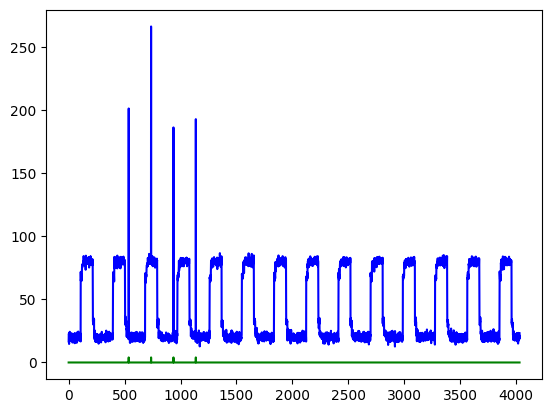

In [39]:
#잘 생성되었나 test
test = pd.read_csv(f"data/{signal_name}/anormal_spike/{signal_name}_spike23.csv")
plt.plot(test["value"],c='blue')
#plt.plot(test["error_size"],c='orange')
plt.plot(test['error'],c='green')

In [40]:
#stuck 생성
for i in range(file_cnt):
    #normal 생성
    np_random_value = 2*np.random.normal(0,1,len_value)
    np_normal_noise = np_random_value + np_orign
    #stuck 초기화
    stuck_start = np.random.randint(100,2500)
    stuck_offset = 100*np.random.randint(5,15)
    #stuck_error 구하기
    np_error_size = np.array([0 for _ in range(len_value)])
    np_error_size[stuck_start:stuck_start+stuck_offset] = np.array([np_normal_noise[stuck_start] for _ in range(stuck_offset)]) - np_normal_noise[stuck_start:stuck_start+stuck_offset]
    #normal 에 stuck
    np_anormal_stuck = np_normal_noise
    np_anormal_stuck[stuck_start:stuck_start+stuck_offset] = np.array([np_normal_noise[stuck_start] for _ in range(stuck_offset)])
    
    np_error =np.array([0 for _ in range(len_value)])
    np_error[stuck_start:stuck_start+stuck_offset] = np.array([5 for _ in range(stuck_offset)])

    np_anormal_stuck_error = np.column_stack((np_anormal_stuck,np_error,np_error_size))
    header = "value,error,error_size"
    np.savetxt(f"data/{signal_name}/anormal_stuck/{signal_name}_stuck{i}.csv",np_anormal_stuck_error,delimiter=',',header=header,comments='')

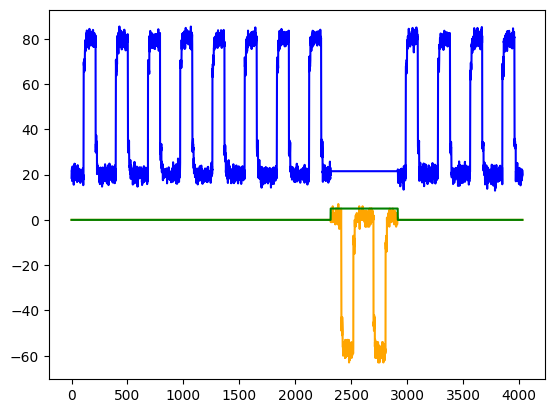

In [45]:
#잘 생성되었나 test
test = pd.read_csv(f"data/{signal_name}/anormal_stuck/{signal_name}_stuck34.csv")
plt.plot(test["value"],c='blue')
plt.plot(test["error_size"],c='orange')
plt.plot(test["error"],c='green')